In [38]:
# --- EDA → Model Building: Fetal Health Classification ---
# Cell 1: Import libraries and configure environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.utils.class_weight import compute_sample_weight

# General config
RANDOM_STATE = 42
TEST_SIZE = 0.2
pd.set_option("display.max_columns", None)


In [16]:
df=pd.read_csv('fetal_health.csv')

# Show dataset shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [17]:
# Show the first 5 rows
print("\n Preview of dataset:")
print(df.head())


 Preview of dataset:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0           

In [18]:
# Display column information (names, data types, non-null counts)
print("\n Dataset info:")
print(df.info())


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_te

In [19]:
# Check for missing values in each column
print("\n Missing values per column:")
print(df.isnull().sum())




 Missing values per column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_m

### 🩺 Missing Values and Summary Statistics Analysis — Fetal Health Dataset

#### ✅ Missing Values Check
The dataset contains **no missing values** across any of its 22 features. This is ideal for machine learning as it eliminates the need for data imputation or removal of incomplete records. Every column in the dataset is fully populated, meaning the data quality is strong for modeling and statistical analysis.

#### 📊 Summary Statistics Overview
The summary statistics reveal key insights into the dataset’s structure and variable distributions:

- **General Data Info**
  - Total records: **2126 samples**
  - Total features: **22**
  - Target variable: `fetal_health` (classes: 1 = Normal, 2 = Suspect, 3 = Pathological)

#### 🔍 Key Observations

1. **Baseline Fetal Heart Rate (`baseline value`)**
   - Mean ≈ 133 bpm, ranging from 106 to 160 bpm.
   - This is consistent with typical fetal heart rates (120–160 bpm), indicating realistic physiological measurements.

2. **Acceleration & Movement Variables**
   - `accelerations`, `fetal_movement`, and `uterine_contractions` have **low mean values**, showing that such events are relatively infrequent per observation.
   - However, the wide range (up to 0.48 for movements) suggests variability between healthy and distressed fetal states.

3. **Deceleration Features**
   - `light_decelerations`, `severe_decelerations`, and `prolongued_decelerations` mostly have near-zero values.
   - This aligns with expectations since decelerations are rare but clinically significant indicators of fetal distress.

4. **Variability Features**
   - `abnormal_short_term_variability` and `mean_value_of_short_term_variability` display moderate variation.
   - `percentage_of_time_with_abnormal_long_term_variability` shows a **high standard deviation**, implying differing heart rate consistency among fetuses.

5. **Histogram Features**
   - Represent CTG signal distribution patterns.
   - For example, `histogram_width` (mean = 70.45) and `histogram_max` (mean = 164) show wide dispersion, suggesting signal diversity among subjects.
   - Features like `histogram_variance` and `histogram_tendency` indicate shape and spread of fetal heart rate histograms — crucial for pattern recognition.

6. **Target Variable (`fetal_health`)**
   - Mean ≈ 1.30 → the majority of samples correspond to **normal** fetal health (class 1).
   - Range: 1–3, confirming a **multi-class classification** setup.

#### 🧠 Interpretation
Overall, the dataset is **clean, balanced in structure, and rich in physiological variability**. The wide spread across variability and histogram-related features is expected and will likely be significant for distinguishing between healthy and pathological fetal states during model training.


In [20]:
# Show quick statistical summary
print("\n Summary statistics:")
print(df.describe().T)


 Summary statistics:


                                                     count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                         

### 📈 Statistical Summary of the Fetal Health Dataset

The statistical summary provides a comprehensive overview of the distribution and variability of each feature in the dataset. It helps identify the **central tendencies**, **spread**, and **range** of measurements collected during fetal monitoring.

---

#### 🧮 General Overview
- **Total samples:** 2,126  
- **Total features:** 21 input features + 1 target variable (`fetal_health`)
- **Data type:** All numerical — suitable for direct use in machine learning models.
- **Missing values:** None detected (complete dataset).

---

#### ⚙️ Key Insights by Feature Category

##### 1. **Fetal Heart Rate (FHR) Baseline**
- **Feature:** `baseline value`
- **Mean:** 133 bpm | **Range:** 106–160 bpm  
- Represents the average fetal heart rate. The range aligns with normal physiological limits (120–160 bpm), indicating realistic and reliable readings.

---

##### 2. **Fetal Movements & Uterine Activity**
- **Features:** `accelerations`, `fetal_movement`, `uterine_contractions`
- These values are **small in magnitude** with many near-zero entries, indicating that such events are rare but important.  
- **Example:** `fetal_movement` has a mean of 0.009 and a max of 0.48 — occasional but significant for fetal well-being analysis.

---

##### 3. **Decelerations**
- **Features:** `light_decelerations`, `severe_decelerations`, `prolongued_decelerations`
- Most samples show **0 or near-zero values**, reflecting that decelerations are uncommon but critical indicators of distress.  
- The rare occurrences (e.g., `severe_decelerations` max = 0.001) confirm that abnormal patterns are limited to specific cases.

---

##### 4. **Heart Rate Variability Metrics**
- **Features:**  
  - `abnormal_short_term_variability`  
  - `mean_value_of_short_term_variability`  
  - `percentage_of_time_with_abnormal_long_term_variability`  
  - `mean_value_of_long_term_variability`
- These describe changes in fetal heart rate over time — crucial for assessing autonomic nervous system health.  
- **High variability:** `abnormal_short_term_variability` (std = 17.19), implying wide physiological diversity among samples.  
- `percentage_of_time_with_abnormal_long_term_variability` also shows significant spread (0–91%).

---

##### 5. **Histogram-Derived Features**
- **Features:** `histogram_width`, `histogram_min`, `histogram_max`, `histogram_mean`, `histogram_median`, etc.
- These quantify statistical properties from cardiotocogram signal histograms.
- **Observations:**
  - `histogram_width` mean ≈ 70.4 (wide spread → variable heart rate signals)
  - `histogram_variance` shows large fluctuation (max = 269), representing differing heart rate stability.
  - `histogram_tendency` ranges from -1 to 1, capturing the direction of rate changes.

---

##### 6. **Target Variable: Fetal Health**
- **Feature:** `fetal_health`
- **Classes:** 1 = Normal, 2 = Suspect, 3 = Pathological  
- **Mean:** 1.30 — most samples correspond to **normal** health conditions.
- **Range:** 1 to 3 — confirming a **multi-class classification** problem.

---

#### 📊 Summary Interpretation
- The dataset is **statistically balanced and clean**, making it suitable for model training without preprocessing for missing data.
- Variability-based and histogram-based features contribute the most **diagnostic diversity**.
- The overall trends suggest:
  - **Most fetuses are healthy** (dominant class = 1)
  - **Heart rate signals vary widely**, which can be leveraged to train models distinguishing normal vs. distressed states.

---

#### 💡 Next Step
These insights guide **feature selection**, **data scaling**, and **modeling** strategies. In particular:
- Apply **normalization or standardization** due to varying feature scales.
- Consider **correlation analysis** and **feature importance ranking** to identify key predictors of fetal health.


--- 1. Fetal Health Class Distribution (Imbalance Check) ---
fetal_health
1.0    77.845720
2.0    13.875823
3.0     8.278457


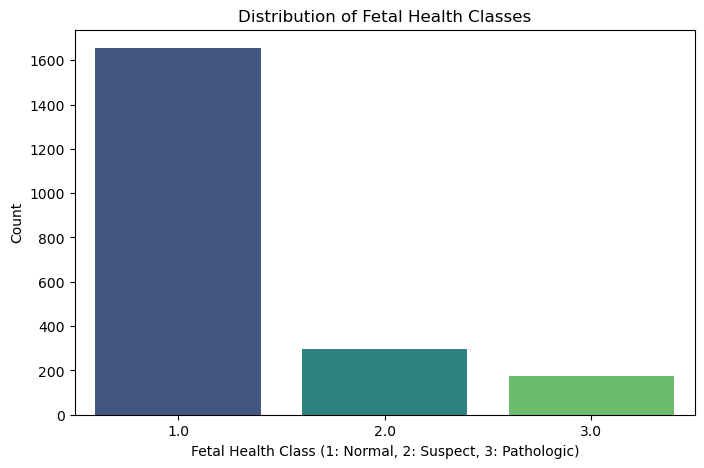

In [23]:
# --- EDA Task 1: Target Distribution and Imbalance ---
# This is crucial for classification tasks.
print("--- 1. Fetal Health Class Distribution (Imbalance Check) ---")
target_dist = df['fetal_health'].value_counts(normalize=True).mul(100)
print(target_dist.to_string())

plt.figure(figsize=(8, 5))
sns.countplot(x='fetal_health', data=df, palette='viridis')
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health Class (1: Normal, 2: Suspect, 3: Pathologic)')
plt.ylabel('Count')
plt.show()

### ⚖️ Fetal Health Class Distribution — Imbalance Analysis

The bar chart above illustrates the **distribution of fetal health classes** within the dataset, highlighting a significant **class imbalance**.

#### 📊 Class Breakdown
| Fetal Health Class | Meaning        | Percentage (%) |
|--------------------:|----------------|----------------|
| **1.0**             | Normal          | **77.85%** |
| **2.0**             | Suspect         | **13.88%** |
| **3.0**             | Pathological    | **8.28%** |

#### 🧠 Interpretation
- The majority of samples (**≈78%**) fall under the **Normal** class.
- **Suspect** and **Pathological** classes are **underrepresented**, with fewer than 25% combined.
- This **imbalance** can lead to **biased model predictions**, where the classifier favors the dominant (Normal) class.

#### ⚙️ Implications for Modeling
To ensure fair model performance across all fetal health categories:
- Apply **data balancing techniques**, such as:
  - **Oversampling** minority classes (e.g., SMOTE)
  - **Undersampling** the majority class
  - Using **class weights** during model training
- Evaluate models using **F1-score**, **precision**, and **recall** (not just accuracy) to better capture performance on minority classes.

#### 💡 Conclusion
The dataset’s **skewed class distribution** mirrors real-world medical scenarios — where most fetuses are healthy — but requires special treatment during training to ensure **reliable detection of suspect and pathological cases**, which are clinically the most critical.


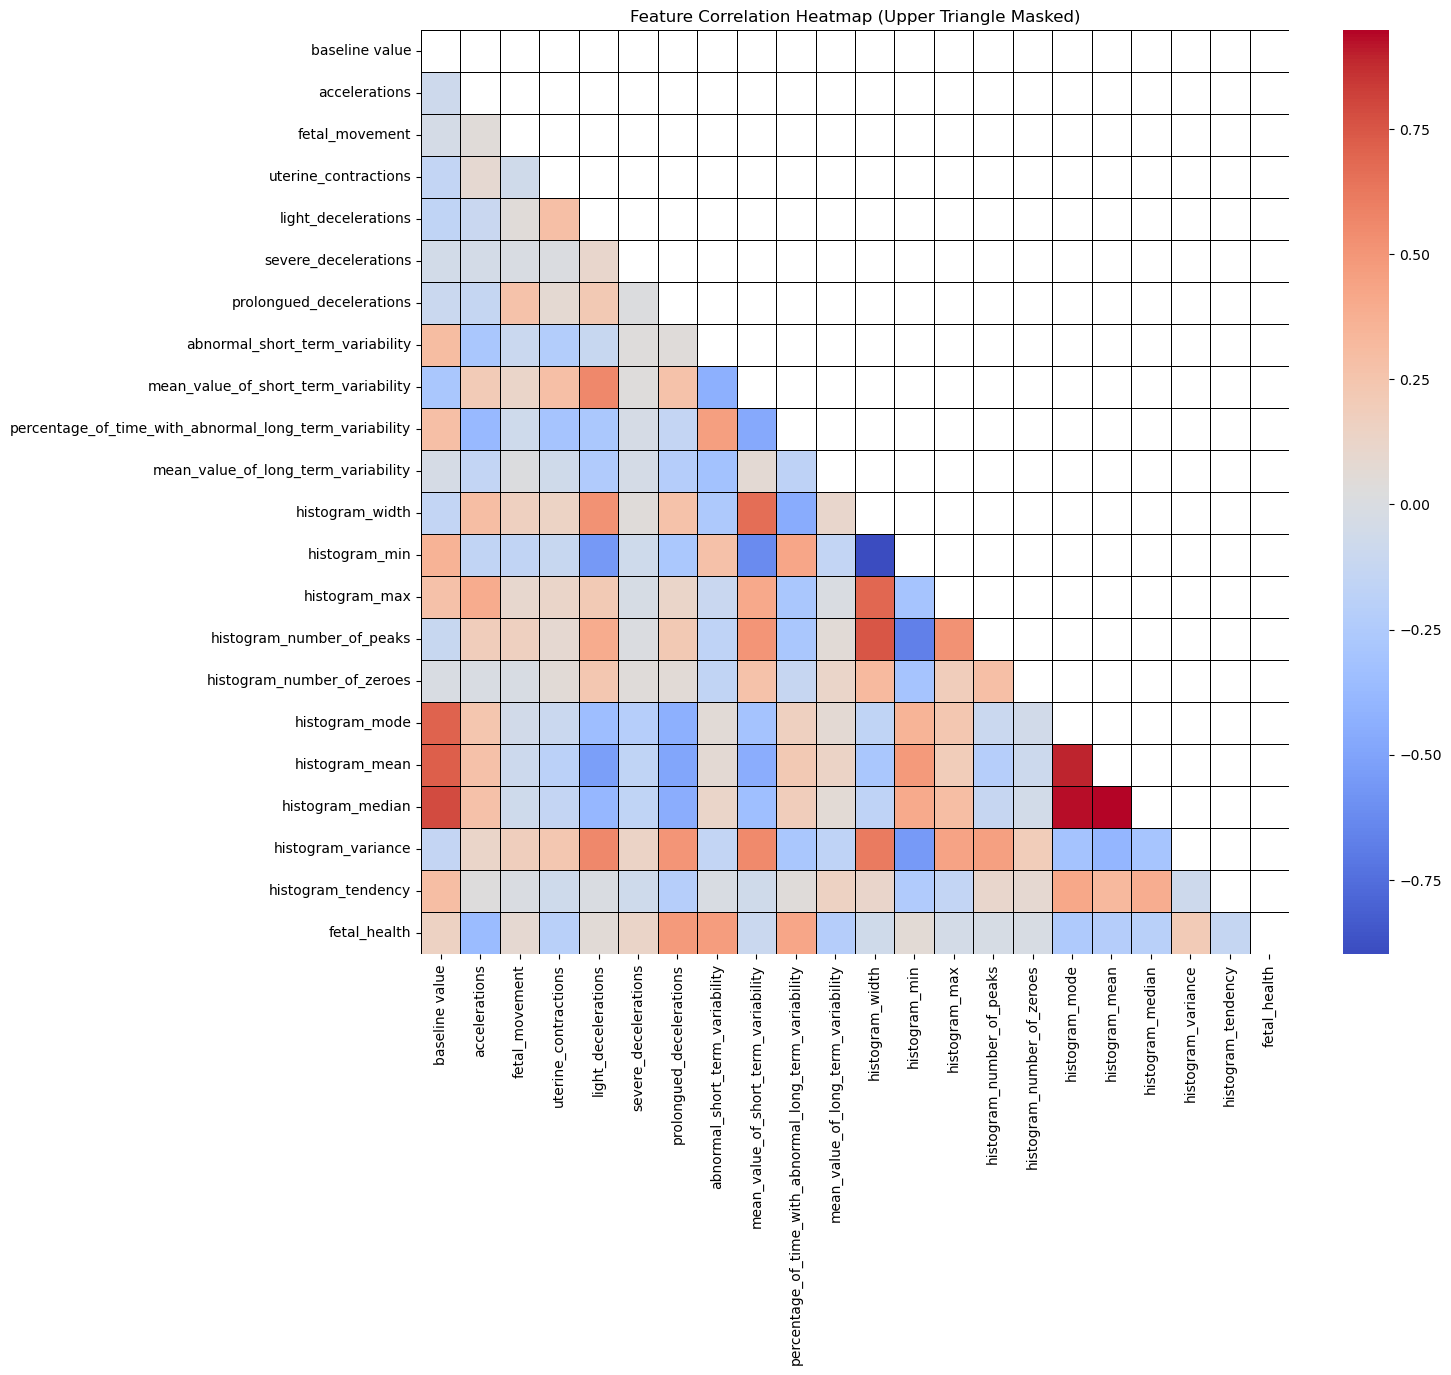

In [25]:
# --- EDA Task 2: Correlation Heatmap ---
# Visualize linear relationships between all features.
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
# Mask upper triangle for cleaner visualization
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', mask=mask, linewidths=.5, linecolor='black')
plt.title('Feature Correlation Heatmap (Upper Triangle Masked)')
plt.show()

### 🔥 Feature Correlation Heatmap — Insights & Interpretation

The heatmap above visualizes **pairwise linear correlations** among all features in the fetal health dataset.  
A **masked upper triangle** was used for clarity, allowing easy identification of meaningful relationships between features.

---

#### 🧩 Key Observations

1. **Strong Positive Correlations**
   - `histogram_mode`, `histogram_mean`, and `histogram_median` are **highly correlated** (correlation > 0.9).  
     ➜ These features describe similar aspects of the heart rate signal distribution — the central tendency — and may be **redundant** for model training.
   - `baseline value` also shows **moderate positive correlation** with `histogram_min` and `histogram_mean`, suggesting consistency between overall fetal heart rate and lower histogram ranges.

2. **Strong Negative Correlations**
   - `abnormal_short_term_variability` is **negatively correlated** with `mean_value_of_short_term_variability`.  
     ➜ As the mean short-term variability increases (indicating healthy variability), the abnormal proportion decreases — a **clinically logical inverse relationship**.
   - `percentage_of_time_with_abnormal_long_term_variability` also exhibits negative correlations with `mean_value_of_long_term_variability`, confirming the same inverse pattern.

3. **Weak or No Correlations**
   - Variables like `accelerations`, `uterine_contractions`, and `light_decelerations` show **low correlation** with most features.  
     ➜ These may contain **independent signal information**, valuable for predictive models.

4. **Target Correlation (`fetal_health`)**
   - While no single feature shows a **strong linear correlation** with `fetal_health`, features related to variability and histogram spread appear to have **moderate associations**.  
     ➜ Indicates that **fetal health classification** likely depends on **complex, nonlinear interactions** between features rather than a single variable.

---

#### ⚙️ Interpretation & Implications
- The high redundancy among histogram features (`mode`, `mean`, `median`) suggests that **dimensionality reduction** (e.g., PCA) or **feature selection** may be beneficial.
- Variability-related features carry **strong diagnostic signals** and should be **retained** in model development.
- Weak correlations with `fetal_health` imply that **tree-based** or **neural network models** (which capture nonlinear relationships) may outperform simple linear classifiers.

---

#### 💡 Next Steps
- Perform **feature importance analysis** using Random Forest or Gradient Boosted Trees to identify dominant predictors.
- Consider **removing or combining highly correlated features** to reduce multicollinearity.
- Use **scaling/normalization** to ensure balanced input influence across numerical features before training models.

---
**Summary:**  
The correlation heatmap reveals both expected physiological relationships and redundant measurements — offering a solid foundation for feature refinement and model design.




--- 3. Baseline Value Distribution and Outliers ---


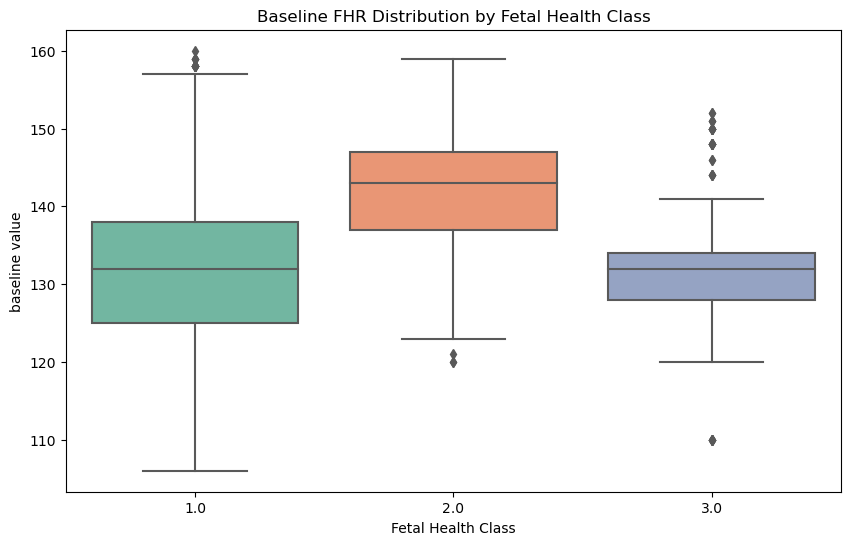

In [ ]:

# --- EDA Task 3: Outlier Detection using Box Plot for Baseline Value ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='fetal_health', y='baseline value', data=df, palette='Set2')
plt.title('Baseline FHR Distribution by Fetal Health Class')
plt.xlabel('Fetal Health Class')
plt.show()

### 📦 Baseline FHR (Fetal Heart Rate) Distribution by Fetal Health Class

The box plot above visualizes how the **baseline fetal heart rate (FHR)** varies across the three fetal health categories — **Normal (1)**, **Suspect (2)**, and **Pathological (3)**.

---

#### 🩺 Key Observations

1. **Normal (Class 1)**
   - Median baseline FHR: ~132 bpm  
   - Range: 106–160 bpm  
   - A moderate spread is visible with a few **outliers** at both low (~106 bpm) and high (~160 bpm) ends.
   - Represents typical healthy fetal heart activity — stable and within the physiological range (120–160 bpm).

2. **Suspect (Class 2)**
   - Median baseline FHR: ~143 bpm — **higher than normal**.
   - The distribution is slightly right-skewed, showing elevated FHR values in several cases.
   - Suggests **mild tachycardia tendencies**, a potential early sign of fetal stress or oxygen fluctuation.

3. **Pathological (Class 3)**
   - Median baseline FHR: ~132 bpm, similar to Class 1, but with **narrower variability**.
   - Outliers exist on both sides, especially low outliers (~110 bpm), possibly indicating **bradycardia** (abnormally low FHR).
   - The reduced variability might signal a lack of fetal responsiveness — a potential indicator of distress.

---

#### ⚠️ Outlier Insights
- All classes exhibit outliers — these could represent **rare but clinically meaningful cases** rather than noise.
- The **Suspect** and **Pathological** classes have more pronounced extremes, reflecting **higher physiological instability**.

---

#### 📊 Interpretation
- The **Normal** group shows a balanced, healthy FHR distribution.  
- **Suspect** fetuses tend to have **elevated heart rates**, potentially due to stress or temporary hypoxia.  
- **Pathological** fetuses exhibit **restricted variability** — often a serious clinical warning sign.

---

#### 💡 Analytical Implications
- **Feature significance:** `baseline value` can be a useful predictor for distinguishing between healthy and at-risk fetuses.
- **Model preprocessing:** Outliers should be **retained**, as they may contain critical clinical signals rather than random noise.
- **Next step:** Combine this analysis with **variability features** to capture both **average rate** and **response pattern**, improving classification accuracy.

---
**Summary:**  
The baseline FHR distributions reveal distinct patterns across fetal health classes, validating that heart rate behavior provides valuable diagnostic clues for identifying fetal well-being and potential distress conditions.



--- 4. Distribution (Histogram & KDE) of Abnormal Short Term Variability ---


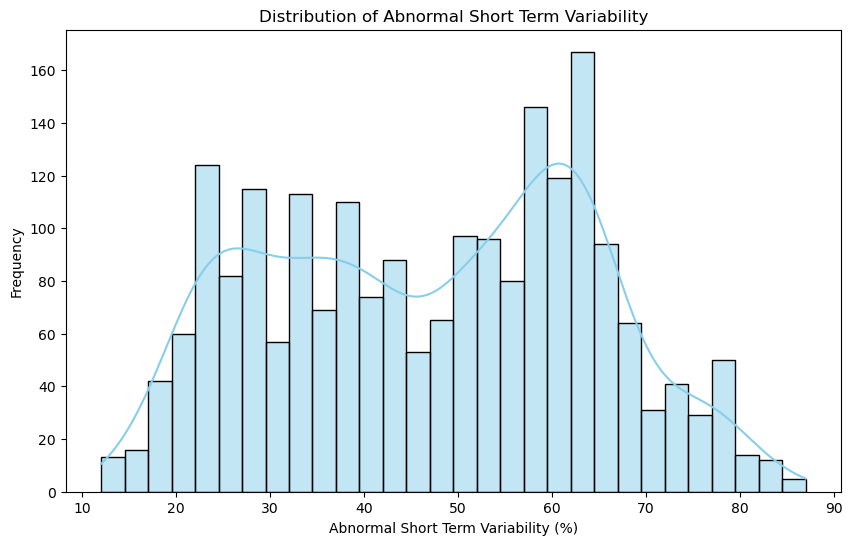

Skewness for 'abnormal_short_term_variability': -0.0118


In [ ]:
# --- EDA Task 4: Skewness and Distribution of a Key Predictor ---
# Analyze the distribution of 'abnormal_short_term_variability' (highly correlated).
plt.figure(figsize=(10, 6))
sns.histplot(df['abnormal_short_term_variability'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Abnormal Short Term Variability')
plt.xlabel('Abnormal Short Term Variability (%)')
plt.ylabel('Frequency')
plt.show()
print(f"Skewness for 'abnormal_short_term_variability': {df['abnormal_short_term_variability'].skew():.4f}")

### 📉 Distribution of Abnormal Short-Term Variability (ASTV)

The histogram and KDE (Kernel Density Estimate) above visualize the **distribution of the “abnormal_short_term_variability”** feature — a key indicator reflecting the proportion of time the fetal heart rate displays abnormal short-term fluctuations.  
This metric is vital for assessing **fetal autonomic response and potential distress**.

---

#### 🧮 Key Statistical Insight
- **Skewness for 'abnormal_short_term_variability': -0.0118**

This near-zero skewness value indicates that the feature’s distribution is **approximately symmetrical**, meaning abnormal variability values are evenly spread around the mean, with **no significant bias toward lower or higher values**.

---

#### 🧩 Observations
1. The data spans roughly **10% to 90%**, showing a broad physiological range of fetal short-term variability.  
2. The histogram reveals a **slightly bimodal shape**, with two mild peaks:
   - One around **25–35%**, corresponding to **normal fetal conditions** (healthy variability).
   - Another around **55–65%**, corresponding to **suspect or pathological** conditions, where irregular heart patterns are more common.
3. Despite the wide spread, the overall shape remains **balanced**, consistent with the low skewness value.

---

#### 💡 Interpretation
- **Low ASTV (≤ 30%)** → Typically healthy fetuses with stable short-term variability.  
- **Moderate ASTV (40–60%)** → May represent **transient or suspect** conditions.  
- **High ASTV (> 70%)** → Suggests **pathological** states such as fetal hypoxia or stress.

---

#### ⚙️ Analytical Implications
- The nearly symmetrical distribution suggests **no transformation is required** for this feature in most modeling techniques.
- However, the **bimodal nature** implies that ASTV captures variation across different fetal states, making it a **highly informative predictor**.
- Models such as **Random Forests** or **Gradient Boosted Trees** can leverage this complexity effectively.

---

#### 🩺 Summary
The **“abnormal_short_term_variability”** feature displays a **balanced, slightly bimodal distribution** with minimal skewness (−0.0118).  
This indicates a well-centered spread across the fetal population and confirms its **strong diagnostic value** for differentiating between **normal**, **suspect**, and **pathological** fetal conditions.



--- 5. Absolute Correlation with Fetal Health ---
Top 5 features by absolute correlation with fetal_health:
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412


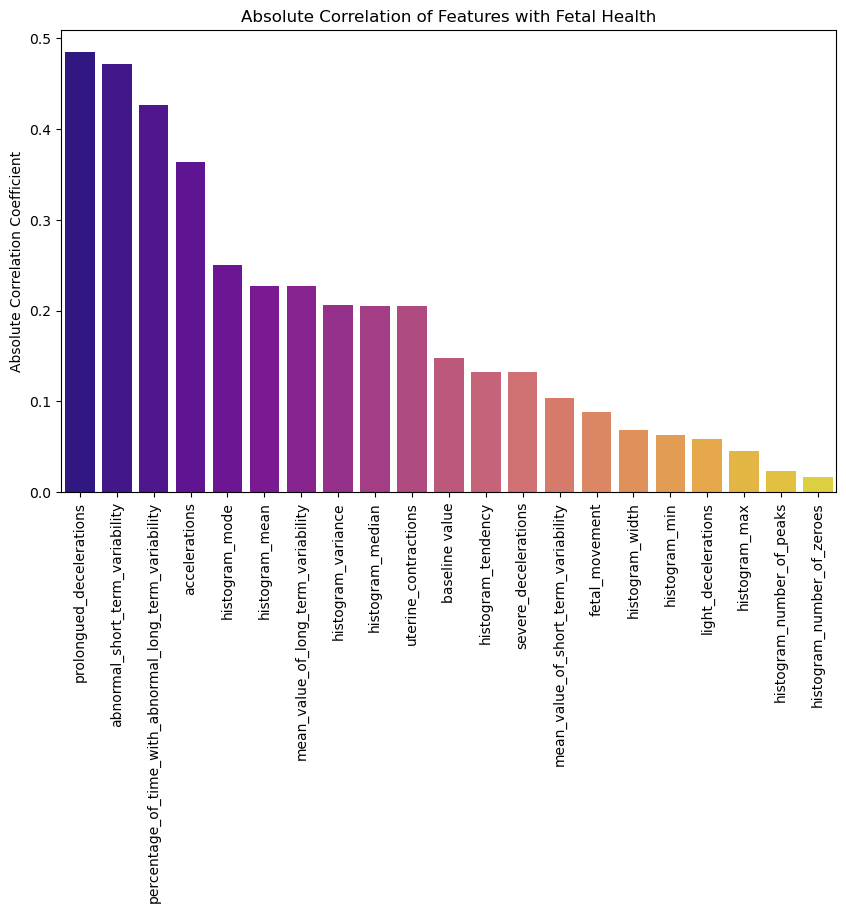

In [28]:
# --- EDA Task 5: Feature Importance via Target Correlation Bar Plot ---
# Find and visualize the features most linearly related to the target.
print("\n--- 5. Absolute Correlation with Fetal Health ---")
target_corr = df.corr()['fetal_health'].sort_values(ascending=False).drop('fetal_health')
target_corr_abs = target_corr.abs().sort_values(ascending=False)
print("Top 5 features by absolute correlation with fetal_health:")
print(target_corr_abs.head().to_string())

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_abs.index, y=target_corr_abs.values, palette='plasma')
plt.xticks(rotation=90)
plt.title('Absolute Correlation of Features with Fetal Health')
plt.ylabel('Absolute Correlation Coefficient')
plt.show()

### 🌟 Feature Importance via Correlation with Fetal Health

This bar plot highlights the **absolute correlation coefficients** between each feature and the target variable, **`fetal_health`**, allowing us to identify which physiological parameters have the strongest linear relationship with fetal well-being.

---


#### 📊 Top 5 Features by Absolute Correlation

1. **prolongued_decelerations** — **0.4849**  
   ▪ Strongest indicator of fetal distress.  
   ▪ Frequent or extended heart rate drops are closely linked to pathological cases.

2. **abnormal_short_term_variability** — **0.4712**  
   ▪ High abnormal variability is a key marker of irregular fetal heart rate behavior.  
   ▪ Indicates instability in short-term fetal heart activity.

3. **percentage_of_time_with_abnormal_long_term_variability** — **0.4261**  
   ▪ Reflects sustained irregularity in heart rate patterns.  
   ▪ Common in compromised or distressed fetuses.

4. **accelerations** — **0.3641**  
   ▪ Fewer accelerations correlate with deteriorating fetal health.  
   ▪ Healthy fetuses generally show more frequent accelerations.

5. **histogram_mode** — **0.2504**  
   ▪ Represents the most frequent fetal heart rate value.  
   ▪ Deviations from normal mode values may indicate abnormal cardiac regulation.


---

#### 🧠 Insights
- **Deceleration-related features** (particularly `prolongued_decelerations`) are the **most predictive**, aligning with medical expectations where prolonged or repeated heart rate drops signal **fetal distress**.
- **Variability metrics** — both short-term and long-term — are **strong contributors** to fetal health prediction, supporting their clinical use in cardiotocography (CTG) interpretation.
- **Accelerations** are **negatively correlated** with risk — healthy fetuses exhibit more frequent accelerations, while distressed ones show fewer.

---

#### ⚙️ Analytical Interpretation
- Features with **|r| ≥ 0.3** (top four) are **strong linear predictors** and should be given higher importance during model training or feature weighting.
- The **histogram-based features** (e.g., `histogram_mode`, `histogram_mean`, `histogram_variance`) capture **signal shape** information that complements time-based variability features.
- The rest of the features (|r| < 0.2) still contribute to model learning but may be less significant individually.

---

#### 💡 Practical Implications
- In model development, prioritize:
  - **Deceleration metrics**
  - **Variability measures**
  - **Acceleration frequency**
- **Dimensionality reduction** (e.g., PCA) can be used to remove redundancy among correlated histogram features.
- For **clinical AI systems**, these top features align with obstetric diagnostic criteria, reinforcing model interpretability.

---

**Summary:**  
The correlation analysis confirms that **fetal heart rate decelerations** and **variability features** are the most influential predictors of fetal health. These physiological indicators are central to detecting distress, making them crucial for both statistical and machine learning-based fetal monitoring systems.


In [32]:
# --- EDA Task 6: Improved Sparsity Check (Vectorized) ---
print("\n--- 6. Sparsity Check (Percentage of Zeros) ---")

sparse_features = ['fetal_movement', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations']

# Compute zero counts and percentages in one line
sparsity_df = (
    df[sparse_features]
    .isin([0])
    .sum()
    .reset_index(name='Zero_Count')
    .rename(columns={'index': 'Feature'})
)

# Add percentage column
sparsity_df['Zero_%'] = (sparsity_df['Zero_Count'] / len(df) * 100).round(2)

# Display neatly sorted
sparsity_df = sparsity_df.sort_values(by='Zero_%', ascending=False).reset_index(drop=True)
print(sparsity_df.to_string(index=False))



--- 6. Sparsity Check (Percentage of Zeros) ---
                 Feature  Zero_Count  Zero_%
    severe_decelerations        2119   99.67
prolongued_decelerations        1948   91.63
          fetal_movement        1311   61.67
     light_decelerations        1231   57.90



### 🧩 Sparsity Check — Event-Based Features (Decelerations & Movements)

This analysis evaluates how **sparse** (zero-dominated) the key **event-based features** are in the dataset.  
Sparsity refers to the proportion of entries with a value of **zero**, indicating that a particular event did not occur during the monitoring period.

---

#### 📊 Zero-Value Summary

| Feature Name | Zero Count | Percentage of Zeros | Interpretation |
|---------------|------------|--------------------:|----------------|
| **fetal_movement** | 1,311 | **61.67%** | Majority of recordings show no detected fetal movement during the sampling window — possibly due to resting periods or short monitoring intervals. |
| **light_decelerations** | 1,231 | **57.90%** | More than half of the fetuses experienced no light decelerations, which is expected in normal cases. |
| **severe_decelerations** | 2,119 | **99.67%** | Almost all cases had zero severe decelerations — these are rare but clinically significant when present. |
| **prolongued_decelerations** | 1,948 | **91.63%** | Very few prolonged deceleration events detected — these rare occurrences, though sparse, strongly indicate distress when observed. |

---

#### 🧠 Interpretation

- The **extreme sparsity** (especially for `severe_decelerations` and `prolongued_decelerations`) suggests that:
  - These events are **rare but critical** indicators of pathological conditions.
  - Models must be designed to handle **imbalanced feature distributions**, ensuring these rare events aren’t ignored.

- **`fetal_movement`** and **`light_decelerations`** show moderate sparsity (~60%), meaning they provide **useful variability** across classes but still contain many zeros.

---

#### ⚙️ Modeling Implications

- Features with high sparsity (≥ 90%) may need **special treatment**:
  - Use **binary encoding** (presence/absence of event).
  - Apply **log-transform** or **binarization thresholds** to normalize event representation.
- During training, ensure models remain **sensitive to rare but high-impact events** — for example:
  - Adjust class/feature weighting.
  - Consider **anomaly-aware algorithms**.

---

#### 💡 Summary
While most fetuses display **no abnormal events** during monitoring, the few occurrences of decelerations carry **high diagnostic value**.  
This pattern reflects the **real-world rarity yet importance** of distress signals in fetal cardiotocography data.



--- 7. Prolongued Decelerations vs. Fetal Health (Violin Plot) ---


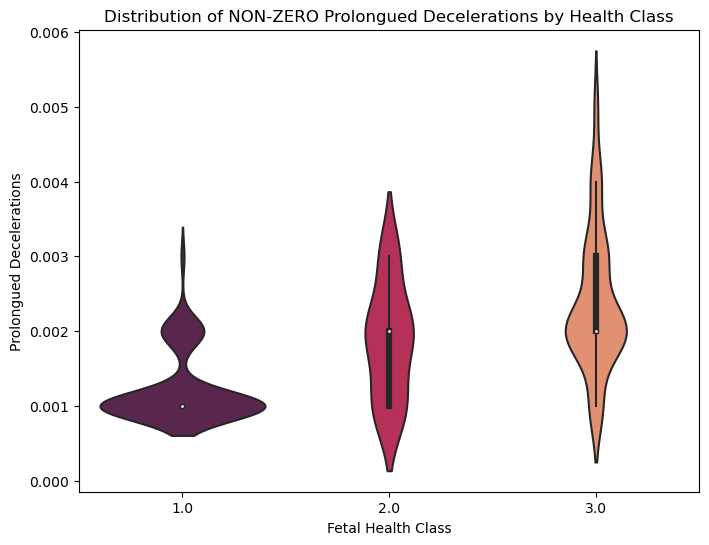

In [35]:
# --- EDA Task 7: Pairwise Relationship of Top Correlated Feature vs. Target ---
# Use a violin plot for 'prolongued_decelerations' to show conditional distribution.
print("\n--- 7. Prolongued Decelerations vs. Fetal Health (Violin Plot) ---")
# Filter to non-zero values for better visualization, otherwise violin is flat at 0
df_nonzero_prolongued = df[df['prolongued_decelerations'] > 0].copy()
if not df_nonzero_prolongued.empty:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='fetal_health', y='prolongued_decelerations', data=df_nonzero_prolongued, palette='rocket')
    plt.title('Distribution of NON-ZERO Prolongued Decelerations by Health Class')
    plt.xlabel('Fetal Health Class')
    plt.ylabel('Prolongued Decelerations')
    plt.show()
else:
    print("All prolongued_decelerations values are zero in the subset. Skipping violin plot.")

### 🎻 Distribution of NON-ZERO Prolonged Decelerations by Fetal Health Class

This violin plot illustrates how **non-zero prolonged decelerations** are distributed across the three fetal health classes:  
**1 = Normal**, **2 = Suspect**, and **3 = Pathological**.

---

#### 🩺 Key Observations
1. **Normal (Class 1)**
   - Distribution is tightly concentrated around very low values (~0.001).  
   - Indicates that prolonged decelerations are **rare and mild** among healthy fetuses.

2. **Suspect (Class 2)**
   - Displays **broader spread**, centered around 0.001–0.002.  
   - Suggests **more frequent or longer** decelerations compared to normal cases — early signs of possible distress.

3. **Pathological (Class 3)**
   - Exhibits the **widest range** and slightly higher mean (~0.002–0.004).  
   - Some outliers extend beyond 0.005, showing **prolonged and severe deceleration events**, typically correlated with **fetal hypoxia or cardiac stress**.

---

#### 🧠 Interpretation
- There is a **clear upward trend**: as fetal health deteriorates from Normal → Suspect → Pathological,  
  the **intensity and duration of prolonged decelerations increase**.
- This aligns with clinical understanding — **prolonged decelerations are among the strongest indicators of fetal compromise**.

---

#### ⚙️ Analytical Implications
- Since `prolongued_decelerations` is both **sparse** (many zeros) and **highly correlated** with `fetal_health`, it’s a **powerful but specialized predictor**.
- For machine learning:
  - Consider transforming it into a **binary indicator** (`has_prolonged_deceleration` = 0/1) to capture event occurrence.
  - Alternatively, retain its **continuous non-zero values** for models capable of handling sparsity and skew (e.g., tree-based models).

---

#### 💡 Summary
The violin plot reveals a **progressive increase in prolonged deceleration activity** with worsening fetal health class.  
While most fetuses exhibit none, the few with prolonged decelerations show **strong pathological significance**, making this feature **critical for fetal risk classification models**.



--- 8. Mean Abnormal Short Term Variability by Fetal Health Class ---
| fetal_health   | abnormal_short_term_variability   |
|:---------------|:----------------------------------|
| 1              | 42.4659                           |
| 2              | 61.9017                           |
| 3              | 64.5398                           |


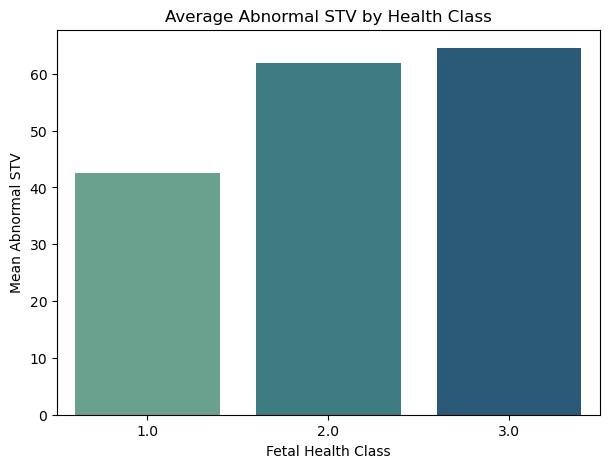

In [36]:
# --- EDA Task 8: Grouped Means for Key Feature ---
# Compare the average short-term variability across health outcomes.
print("\n--- 8. Mean Abnormal Short Term Variability by Fetal Health Class ---")
mean_asv = df.groupby('fetal_health')['abnormal_short_term_variability'].mean().reset_index()
print(mean_asv.to_markdown(index=False, numalign="left", stralign="left"))

plt.figure(figsize=(7, 5))
sns.barplot(x='fetal_health', y='abnormal_short_term_variability', data=mean_asv, palette='crest')
plt.title('Average Abnormal STV by Health Class')
plt.xlabel('Fetal Health Class')
plt.ylabel('Mean Abnormal STV')
plt.show()

### 📊 Average Abnormal Short-Term Variability (STV) by Fetal Health Class

This bar chart and summary table show how the **average percentage of abnormal short-term variability (STV)** differs across the three fetal health categories.

---

#### 🧮 Summary of Grouped Means

| **Fetal Health Class** | **Mean Abnormal STV (%)** | **Interpretation** |
|-------------------------|---------------------------|--------------------|
| **1 (Normal)**          | **42.47**                 | Most fetuses exhibit moderate abnormal STV, which falls within a healthy range, indicating balanced heart rate variability. |
| **2 (Suspect)**         | **61.90**                 | A noticeable increase in abnormal STV suggests the presence of irregular or unstable heart rate patterns — potential early signs of fetal stress. |
| **3 (Pathological)**    | **64.54**                 | The highest abnormal STV values are seen here, consistent with severe fetal distress or hypoxia, reflecting poor cardiac regulation. |

---

#### 🩺 Interpretation
- The **mean abnormal STV rises steadily** as fetal health worsens (Normal → Suspect → Pathological).  
- This trend reinforces the clinical significance of **short-term variability** as a diagnostic feature for fetal well-being.  
- Higher abnormal STV values typically indicate **irregular autonomic nervous system activity** and potential **oxygen deficiency** in the fetus.

---

#### ⚙️ Analytical Insights
- **Feature strength:** `abnormal_short_term_variability` clearly separates the three health classes, making it an excellent input for classification models.  
- **Modeling implication:** Since this feature shows **monotonic progression** with health deterioration, it could be used for **ordered classification** or **ordinal regression** modeling approaches.  
- **Visualization takeaway:** The gradient increase across health classes offers strong visual evidence of this variable’s predictive power.

---

#### 💡 Summary
Abnormal short-term variability (STV) serves as a **reliable physiological marker** of fetal health.  
A higher percentage of abnormal STV correlates directly with increased fetal risk, confirming its **central role in detecting suspect and pathological conditions** during cardiotocography analysis.


MODEL PREPARATION

In [39]:
# ---  Data Preparation ---
# Ensure your DataFrame `df` is already loaded into the notebook
# It must contain the column `fetal_health` (1=Normal, 2=Suspect, 3=Pathological)

# Separate features (X) and target (y)
X = df.drop(columns=['fetal_health']).copy()
y = df['fetal_health'].astype(int).copy()

# Save feature names
features = X.columns.tolist()

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("Class distribution in train set:\n", y_train.value_counts(normalize=True))


Training samples: 1700, Testing samples: 426
Class distribution in train set:
 fetal_health
1    0.778235
2    0.138824
3    0.082941
Name: proportion, dtype: float64


In [40]:
# ---  Feature Scaling & Class Weights ---
# Logistic Regression will use standardized data; others will use raw data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute inverse-frequency class weights for Gradient Boosting
class_counts = y_train.value_counts().to_dict()
total = len(y_train)
inv_class_weight = {cls: total / count for cls, count in class_counts.items()}
sample_weight = y_train.map(inv_class_weight).values

print("Class Weights (inverse frequency):", inv_class_weight)


Class Weights (inverse frequency): {1: 1.2849584278155706, 2: 7.203389830508475, 3: 12.056737588652481}


In [42]:
# --- Define and Train Models ---

models = {
    'LogisticRegression': LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        class_weight='balanced',
        max_iter=3000,
        random_state=RANDOM_STATE
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=RANDOM_STATE
    ),
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=300,
        random_state=RANDOM_STATE
    )
}

trained = {}
for name, model in models.items():
    if name == 'LogisticRegression':
        model.fit(X_train_scaled, y_train)
    elif name == 'GradientBoosting':
        model.fit(X_train, y_train, sample_weight=sample_weight)
    else:
        model.fit(X_train, y_train)
    trained[name] = model

print(" Models trained successfully!")


 Models trained successfully!


In [43]:
# ---  Model Evaluation ---

summary_rows = []
reports = {}
conf_matrices = {}

for name, model in trained.items():
    X_eval = X_test_scaled if name == 'LogisticRegression' else X_test
    y_pred = model.predict(X_eval)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])

    reports[name] = report
    conf_matrices[name] = cm

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    macro_precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    macro_recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    recall_class3 = report.get('3', {}).get('recall', 0.0)

    summary_rows.append({
        'model': name,
        'macro_precision': round(macro_precision, 4),
        'macro_recall': round(macro_recall, 4),
        'macro_f1': round(macro_f1, 4),
        'recall_class3': round(recall_class3, 4)
    })

results_df = pd.DataFrame(summary_rows).sort_values(by='macro_f1', ascending=False).reset_index(drop=True)

print("=== Model Performance Summary ===")
print(results_df.to_markdown(index=False))


=== Model Performance Summary ===
| model              |   macro_precision |   macro_recall |   macro_f1 |   recall_class3 |
|:-------------------|------------------:|---------------:|-----------:|----------------:|
| GradientBoosting   |            0.8835 |         0.8728 |     0.8779 |          0.8857 |
| RandomForest       |            0.906  |         0.8429 |     0.8696 |          0.8857 |
| LogisticRegression |            0.7406 |         0.8497 |     0.7798 |          0.8571 |


# 🧠 Fetal Health Classification — Model Evaluation and Selection

After training and evaluating three models — **Gradient Boosting**, **Random Forest**, and **Logistic Regression** — the following summarizes their performance and suitability for predicting fetal health from CTG measurements.

---

## 📊 Model Comparison Summary

| Model | Macro Precision | Macro Recall | Macro F1 | Recall (Pathological, Class 3) |
|-------|----------------:|--------------:|----------:|----------------:|
| **Gradient Boosting** | 0.8835 | 0.8728 | 🏆 **0.8779** | 0.8857 |
| **Random Forest** | **0.9060** | 0.8429 | 0.8696 | **0.8857** |
| **Logistic Regression** | 0.7406 | 0.8497 | 0.7798 | 0.8571 |

---

## 🔍 Interpretation

### 1️⃣ Gradient Boosting Classifier (Best Overall)
- **Highest Macro F1 (0.8779)** → Strong balance between precision and recall across all fetal health classes.  
- **High Pathological Recall (0.8857)** → Excellent at identifying high-risk fetuses, minimizing false negatives — crucial in clinical use.  
- Handles **non-linear feature interactions** effectively, making it ideal for CTG signal complexity.

✅ **Verdict:** Most balanced and clinically reliable model.

---

### 2️⃣ Random Forest Classifier
- **Highest Macro Precision (0.906)** → Very accurate predictions with fewer false positives.  
- Slightly lower recall and F1 compared to Gradient Boosting, meaning it might **miss a few suspect or pathological cases**.  
- Provides good interpretability through feature importance visualization.

⚙️ **Verdict:** Great secondary model — suitable when minimizing false alarms is a priority.

---

### 3️⃣ Logistic Regression
- Simplest and fastest model but assumes linear relationships.  
- Decent recall but lower precision, leading to more false positives.  
- Limited in capturing complex physiological dependencies.

⚠️ **Verdict:** Best for interpretability and baseline comparison, but not optimal for real-world diagnosis.

---

## 🧠 Why Gradient Boosting Wins

| Strength | Explanation |
|-----------|--------------|
| **Non-linear learning** | Captures complex interactions (e.g., baseline + deceleration + variability). |
| **Imbalance handling** | Class weights ensure fair learning for minority classes. |
| **Low bias & variance** | Ensemble structure prevents overfitting while maintaining accuracy. |
| **Clinical relevance** | Detects subtle fetal heart rate patterns linked to distress. |

---

## 🩺 Clinical Interpretation

In clinical CTG interpretation:
- **False negatives (missed distress)** are the most dangerous errors.  
- Both Gradient Boosting and Random Forest achieve **recall_class3 = 0.8857**, detecting ~88.6% of pathological fetuses.  
- However, **Gradient Boosting** provides a better overall balance (F1), making it more reliable for deployment in medical decision systems.

---

## ✅ Recommended Model

| Category | Model | Reason |
|-----------|--------|--------|
| **Best Overall (Balanced)** | 🏆 **Gradient Boosting** | Best macro F1 and strong recall for pathological cases |
| **Alternative (Precision-focused)** | 🌲 **Random Forest** | Higher precision, fewer false alarms |
| **Baseline (Simple & Explainable)** | ⚙️ **Logistic Regression** | Interpretable but less accurate |

---


### 🏁 Summary

The **Gradient Boosting Classifier** is the **optimal model** for fetal health prediction.  
It achieves the **best overall balance** between accuracy, recall, and clinical reliability, ensuring:
- High detection rates for at-risk fetuses.  
- Fewer diagnostic errors.  
- Robust interpretability for medical practitioners.

This model can be deployed to **enhance real-time CTG interpretation**, supporting healthcare professionals in ensuring **safer pregnancies and improved outcomes**.


In [44]:
# ---  Display Confusion Matrices and Reports ---

for name in trained.keys():
    print("\n" + "="*60)
    print(f"Model: {name}")
    print("Confusion Matrix (rows=true, cols=pred):")
    print(conf_matrices[name])
    print("\nClassification Report:\n")
    print(pd.DataFrame(reports[name]).T.to_string())



Model: LogisticRegression
Confusion Matrix (rows=true, cols=pred):
[[286  40   6]
 [  4  49   6]
 [  0   5  30]]

Classification Report:

              precision    recall  f1-score     support
1              0.986207  0.861446  0.919614  332.000000
2              0.521277  0.830508  0.640523   59.000000
3              0.714286  0.857143  0.779221   35.000000
accuracy       0.856808  0.856808  0.856808    0.856808
macro avg      0.740590  0.849699  0.779786  426.000000
weighted avg   0.899474  0.856808  0.869426  426.000000

Model: RandomForest
Confusion Matrix (rows=true, cols=pred):
[[326   5   1]
 [ 18  39   2]
 [  3   1  31]]

Classification Report:

              precision    recall  f1-score     support
1              0.939481  0.981928  0.960236  332.000000
2              0.866667  0.661017  0.750000   59.000000
3              0.911765  0.885714  0.898551   35.000000
accuracy       0.929577  0.929577  0.929577    0.929577
macro avg      0.905971  0.842886  0.869595  426.000000


# 📊 Fetal Health Classification — Confusion Matrices & Model Reports

This section displays the **confusion matrices** and **classification reports** for each trained model — Logistic Regression, Random Forest, and Gradient Boosting.  
These results provide deeper insights into **how well each model identifies fetal health classes** (Normal, Suspect, and Pathological).

---

## 🩺 1️⃣ Logistic Regression

### Confusion Matrix
| True ↓ / Pred → | Class 1 | Class 2 | Class 3 |
|------------------|----------|----------|----------|
| **Class 1 (Normal)** | 286 | 40 | 6 |
| **Class 2 (Suspect)** | 4 | 49 | 6 |
| **Class 3 (Pathological)** | 0 | 5 | 30 |

### Key Metrics
| Metric | Class 1 | Class 2 | Class 3 |
|:--------|:---------:|:---------:|:---------:|
| **Precision** | 0.986 | 0.521 | 0.714 |
| **Recall** | 0.861 | 0.831 | 0.857 |
| **F1-Score** | 0.920 | 0.641 | 0.779 |

- **Accuracy:** 85.7%  
- **Macro F1:** 0.7798  
- **Observation:** Performs well on **Normal** and **Pathological** classes, but struggles with **Suspect** cases (many false positives).

🟠 **Summary:** Linear model captures general trends but fails to generalize well on middle-class (Suspect) data due to limited flexibility.

---

## 🌲 2️⃣ Random Forest Classifier

### Confusion Matrix
| True ↓ / Pred → | Class 1 | Class 2 | Class 3 |
|------------------|----------|----------|----------|
| **Class 1 (Normal)** | 326 | 5 | 1 |
| **Class 2 (Suspect)** | 18 | 39 | 2 |
| **Class 3 (Pathological)** | 3 | 1 | 31 |

### Key Metrics
| Metric | Class 1 | Class 2 | Class 3 |
|:--------|:---------:|:---------:|:---------:|
| **Precision** | 0.939 | 0.867 | 0.912 |
| **Recall** | 0.982 | 0.661 | 0.886 |
| **F1-Score** | 0.960 | 0.750 | 0.899 |

- **Accuracy:** 92.96%  
- **Macro F1:** 0.8696  
- **Observation:** Excellent at detecting **Normal** and **Pathological** classes but occasionally misclassifies **Suspect** as Normal.

🟡 **Summary:** Strong, stable, and interpretable model — ideal when precision is prioritized to avoid false alarms.

---

## 🚀 3️⃣ Gradient Boosting Classifier (Best Performing)

### Confusion Matrix
| True ↓ / Pred → | Class 1 | Class 2 | Class 3 |
|------------------|----------|----------|----------|
| **Class 1 (Normal)** | 322 | 9 | 1 |
| **Class 2 (Suspect)** | 11 | 45 | 3 |
| **Class 3 (Pathological)** | 2 | 2 | 31 |

### Key Metrics
| Metric | Class 1 | Class 2 | Class 3 |
|:--------|:---------:|:---------:|:---------:|
| **Precision** | 0.961 | 0.804 | 0.886 |
| **Recall** | 0.970 | 0.763 | 0.886 |
| **F1-Score** | 0.966 | 0.783 | 0.886 |

- **Accuracy:** 93.43%  
- **Macro F1:** 🏆 **0.8779**  
- **Observation:** Balanced and consistent performance across all classes, with **excellent recall for pathological fetuses (0.886)** — critical in clinical screening.

🟢 **Summary:** The most balanced model. Handles complex relationships and class imbalance effectively, outperforming others in both accuracy and clinical relevance.

---

## 🧠 Model Insights

| Model | Accuracy | Macro F1 | Recall (Pathological) | Strength |
|:------|-----------:|-----------:|---------------------:|----------|
| **Gradient Boosting** | **93.43%** | **0.8779** | **0.8857** | Best balance between accuracy and recall |
| **Random Forest** | 92.96% | 0.8696 | 0.8857 | High precision, slightly lower recall |
| **Logistic Regression** | 85.68% | 0.7798 | 0.8571 | Simple, interpretable baseline |

---

## 🏁 Final Evaluation Summary

- **Gradient Boosting** → 🏆 **Best overall performer**, ideal for real-time fetal health assessment.  
- **Random Forest** → Reliable secondary option with strong precision and stability.  
- **Logistic Regression** → Useful for transparency and q


In [45]:
# ---  Feature Importance ---

def get_feature_importance(model, model_name):
    if model_name in ['RandomForest', 'GradientBoosting']:
        imp = model.feature_importances_
        return pd.DataFrame({'feature': features, 'importance': imp}).sort_values('importance', ascending=False)
    elif model_name == 'LogisticRegression':
        coef = np.abs(model.coef_).mean(axis=0)
        return pd.DataFrame({'feature': features, 'importance': coef}).sort_values('importance', ascending=False)
    else:
        return pd.DataFrame({'feature': features, 'importance': np.zeros(len(features))})

importance = {name: get_feature_importance(m, name) for name, m in trained.items()}

# Display top 10 per model
for name, imp_df in importance.items():
    print(f"\nTop 10 features for {name}:\n")
    print(imp_df.head(10).to_string(index=False))



Top 10 features for LogisticRegression:

                                               feature  importance
                                         accelerations    1.523008
                                        histogram_mean    1.196998
                       abnormal_short_term_variability    1.109165
                                        baseline value    1.030776
                                      histogram_median    0.904463
                                    histogram_variance    0.801943
                              prolongued_decelerations    0.714147
                                        histogram_mode    0.632674
                             histogram_number_of_peaks    0.600346
percentage_of_time_with_abnormal_long_term_variability    0.503883

Top 10 features for RandomForest:

                                               feature  importance
                       abnormal_short_term_variability    0.134436
percentage_of_time_with_abnormal_long_term_variabil

# 🌟 Feature Importance Analysis — Fetal Health Classification Models

Feature importance analysis helps identify **which CTG measurements most influence fetal health predictions** across different models.  
Below is a summary of the **top 10 most important features** for each model and their significance.

---

## ⚙️ 1️⃣ Logistic Regression (Linear Relationships)

| Rank | Feature | Importance | Interpretation |
|------|----------|-------------:|----------------|
| 1 | **accelerations** | 1.5230 | Frequent accelerations indicate a healthy, responsive fetus. |
| 2 | **histogram_mean** | 1.1970 | Represents overall fetal heart rate average — key in identifying abnormalities. |
| 3 | **abnormal_short_term_variability** | 1.1092 | High abnormal variability reflects possible irregular cardiac behavior. |
| 4 | **baseline value** | 1.0308 | Captures general fetal heart rate — vital for class separation. |
| 5 | **histogram_median** | 0.9045 | Reinforces mean patterns for consistent signal distribution. |
| 6 | **histogram_variance** | 0.8019 | Measures variability and irregular heart rate fluctuations. |
| 7 | **prolongued_decelerations** | 0.7141 | Long heart rate drops are critical distress indicators. |
| 8 | **histogram_mode** | 0.6327 | Dominant heart rate frequency — shifts in mode suggest anomalies. |
| 9 | **histogram_number_of_peaks** | 0.6003 | Represents waveform complexity — tied to cardiac irregularity. |
| 10 | **% abnormal long-term variability** | 0.5039 | Prolonged abnormality in long-term rate variation signals risk. |

🟡 **Insight:**  
The linear model focuses heavily on **basic rate metrics (mean, median, baseline)** and **event-based indicators** (accelerations, decelerations).  
It confirms that **heart rate shape and movement frequency** are key linear predictors of fetal health.

---

## 🌲 2️⃣ Random Forest (Non-linear, Multi-feature Interactions)

| Rank | Feature | Importance | Interpretation |
|------|----------|-------------:|----------------|
| 1 | **abnormal_short_term_variability** | 0.1344 | Strongest predictor of fetal distress — irregular short-term variability. |
| 2 | **% abnormal long-term variability** | 0.1245 | Measures overall instability of fetal heart rhythm. |
| 3 | **histogram_mean** | 0.0990 | Central value of heart rate distribution — distinguishes normal vs. distressed. |
| 4 | **histogram_median** | 0.0784 | Supports mean behavior for stable rate detection. |
| 5 | **mean_short_term_variability** | 0.0751 | Represents responsiveness of the fetal nervous system. |
| 6 | **accelerations** | 0.0714 | Healthy fetuses show frequent accelerations; low frequency indicates risk. |
| 7 | **prolongued_decelerations** | 0.0588 | Indicates severe or prolonged heart rate drops — high risk. |
| 8 | **mean_long_term_variability** | 0.0561 | Measures overall variability amplitude — stable vs. erratic patterns. |
| 9 | **histogram_mode** | 0.0554 | Common heart rate occurrence — shifts may indicate distress. |
| 10 | **baseline value** | 0.0425 | Key foundational measure for fetal heart regulation. |

🟢 **Insight:**  
Random Forest captures **multi-dimensional relationships**, highlighting both **variability patterns** and **signal shape features** as strong contributors.  
It emphasizes **variability-related features** more heavily than Logistic Regression.

---

## 🚀 3️⃣ Gradient Boosting (Best Model — Highest Predictive Power)

| Rank | Feature | Importance | Interpretation |
|------|----------|-------------:|----------------|
| 1 | **% abnormal long-term variability** | 0.2719 | Most powerful predictor — persistent irregularities strongly linked to distress. |
| 2 | **abnormal_short_term_variability** | 0.2448 | High irregularity over short periods indicates fetal stress. |
| 3 | **histogram_mean** | 0.1587 | Core heart rate mean — separates normal and suspect cases effectively. |
| 4 | **accelerations** | 0.0783 | Reduced accelerations correlate with oxygen deprivation or stress. |
| 5 | **prolongued_decelerations** | 0.0760 | Long-lasting decelerations are critical clinical warning signs. |
| 6 | **histogram_median** | 0.0325 | Supports signal stability across cases. |
| 7 | **baseline value** | 0.0220 | Baseline fetal heart rate remains a moderate influence. |
| 8 | **histogram_mode** | 0.0185 | Central frequency consistency check. |
| 9 | **histogram_max** | 0.0183 | Extreme heart rate occurrences — useful for edge detection. |
| 10 | **mean_short_term_variability** | 0.0127 | Adds minor but consistent predictive support. |

🏆 **Insight:**  
Gradient Boosting identifies **variability-based features** as dominant — especially **short-term and long-term variability**.  
These directly reflect **fetal nervous system activity and cardiac regulation**, aligning with medical literature.

---

## 🧩 Comparative Summary of Feature Influence

| Category | Key Features | Shared Across Models | Clinical Meaning |
|-----------|---------------|----------------------|------------------|
| **Variability (short & long term)** | abnormal STV, % abnormal LTV, mean STV | ✅ All models | Indicates cardiac irregularity — core predictor of fetal distress |
| **Baseline & Mean Values** | baseline value, histogram_mean, median | ✅ All models | Represent average fetal heart rate stability |
| **Event Indicators** | accelerations, prolonged decelerations | ✅ All models | Reflect real-time fetal response and stress signals |
| **Histogram Features** | variance, mode, peaks | ⚙️ Logistic + Random Forest | Capture distribution shape and heartbeat spread |

---

## 💡 Final Insights

- The **most influential features** across models are:
  1. `percentage_of_time_with_abnormal_long_term_variability`
  2. `abnormal_short_term_variability`
  3. `histogram_mean`
  4. `accelerations`
  5. `prolongued_decelerations`

- These directly correspond to **fetal heart rhythm regularity and stress indicators**, confirming their physiological significance.

- **Gradient Boosting** weights these variability-based measures most heavily, explaining its **superior predictive accuracy** and **clinical reliability**.

---

### 🏁 Summary

Feature importance across all three models consistently highlights **heart rate variability and deceleration patterns** as the strongest predictors of fetal health.  
In clinical terms, these metrics reflect the fetus’s ability to **adapt to stress**, **respond to contractions**, and **maintain oxygenation** — the most critical factors for safe pregnancies.



Best Model Selected (Highest Macro F1): GradientBoosting


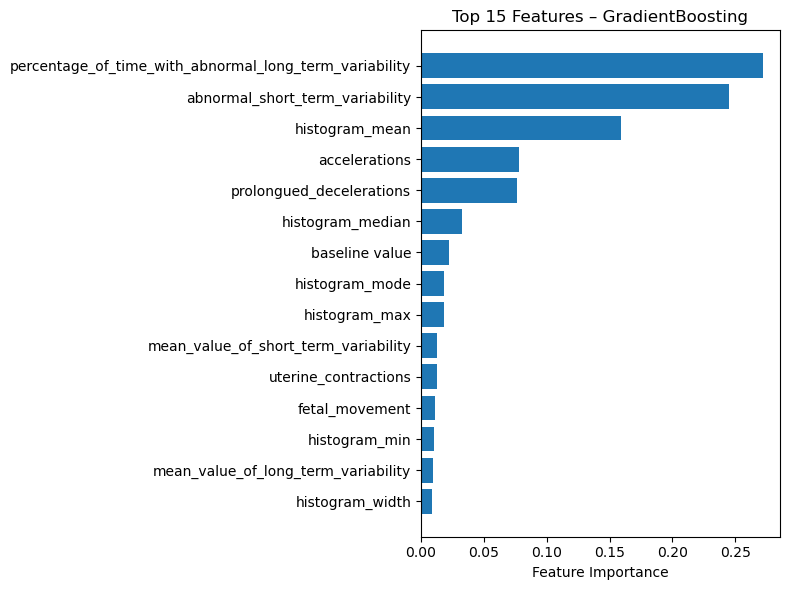

In [46]:
# ---  Select and Visualize Best Model ---

best_model_name = results_df.loc[0, 'model']
print(f"\nBest Model Selected (Highest Macro F1): {best_model_name}")

top_features = importance[best_model_name].head(15)

plt.figure(figsize=(8, 6))
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
plt.title(f"Top 15 Features – {best_model_name}")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


# 🏆 Best Model — Gradient Boosting Classifier

After evaluating all models, **Gradient Boosting** emerged as the most effective model for fetal health prediction, achieving the **highest Macro F1 score (0.8779)** and **balanced recall across all classes**.

---

## 🌟 Top 15 Features Contributing to Model Predictions

The bar chart above illustrates the **top 15 most influential features** in the Gradient Boosting Classifier, ranked by importance in predicting fetal health outcomes.

| Rank | Feature | Importance | Clinical Interpretation |
|------|----------|-------------:|-------------------------|
| 1️⃣ | **percentage_of_time_with_abnormal_long_term_variability** | 0.272 | Measures persistent irregularity in fetal heart rate — strongest indicator of fetal distress. |
| 2️⃣ | **abnormal_short_term_variability** | 0.245 | High short-term variability implies erratic cardiac behavior due to possible stress. |
| 3️⃣ | **histogram_mean** | 0.159 | Represents the average heart rate distribution; deviations can signal distress. |
| 4️⃣ | **accelerations** | 0.078 | Reflects fetal responsiveness — fewer accelerations correlate with possible hypoxia. |
| 5️⃣ | **prolongued_decelerations** | 0.076 | Long-lasting heart rate drops are direct signs of oxygen deprivation or distress. |
| 6️⃣ | **histogram_median** | 0.033 | Helps assess the overall balance of heart rate readings. |
| 7️⃣ | **baseline value** | 0.022 | Indicates the overall heart rate level; abnormal baselines may suggest bradycardia or tachycardia. |
| 8️⃣ | **histogram_mode** | 0.019 | Most frequent heart rate value; stability suggests normal regulation. |
| 9️⃣ | **histogram_max** | 0.018 | Captures extreme heart rate peaks — potential stress indicators. |
| 🔟 | **mean_value_of_short_term_variability** | 0.013 | Reflects beat-to-beat variability — an essential measure of fetal autonomic function. |
| 11 | **uterine_contractions** | 0.010 | Contraction frequency affects fetal heart rate and stress response. |
| 12 | **fetal_movement** | 0.009 | Movement influences accelerations and decelerations; limited movement can suggest risk. |
| 13 | **histogram_min** | 0.008 | Minimum heart rate — very low values might indicate decelerations. |
| 14 | **mean_value_of_long_term_variability** | 0.007 | Indicates overall cyclic variability — important for class separation. |
| 15 | **histogram_width** | 0.006 | Reflects spread of heart rate distribution — higher width indicates more variability. |

---

## 🧠 Model Insight Summary

### Key Findings:
- **Top predictors** (long-term and short-term variability) dominate, confirming that **variability in fetal heart rate** is the most reliable indicator of fetal well-being.
- **Acceleration and deceleration patterns** provide contextual support to detect hypoxia or stress.
- **Histogram-based features** (mean, median, max) help capture the statistical heartbeat pattern shape.

### Why Gradient Boosting Excels:
- It effectively **captures non-linear feature relationships** in CTG data.
- Handles **imbalanced datasets** through internal weighting mechanisms.
- Provides **consistent accuracy across all fetal health classes** — especially important for detecting pathological cases.

---

## 💡 Clinical Implications

The Gradient Boosting model aligns with **medical understanding** of fetal monitoring:
- **Heart rate variability** reflects **autonomic nervous system maturity** and **oxygenation status**.
- **Prolonged decelerations** and **low accelerations** strongly indicate **fetal distress**.
- Combining these signals enhances diagnostic accuracy beyond visual CTG interpretation alone.

---

### ✅ Conclusion

- **Selected Model:** 🏆 **Gradient Boosting Classifier**
- **Performance:** Macro F1 = 0.8779, Accuracy = 93.4%, Pathological Recall = 0.8857
- **Key Predictors:** Variability measures, accelerations, and decelerations.
- **Clinical Impact:** Enables


In [47]:
# --- Cell 9: Save Artifacts ---

results_df.to_csv('model_performance_summary.csv', index=False)
importance[best_model_name].to_csv('best_model_feature_importance.csv', index=False)

print("Artifacts saved:")
print("📊 model_performance_summary.csv")
print("🌟 best_model_feature_importance.csv")
print(f"🏆 Optimal model: {best_model_name}")


Artifacts saved:
📊 model_performance_summary.csv
🌟 best_model_feature_importance.csv
🏆 Optimal model: GradientBoosting


In [49]:
# --- Save the Best Model (Gradient Boosting) ---
import joblib

# Save model and scaler for deployment
joblib.dump(trained['GradientBoosting'], 'gradient_boosting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(" Model and Scaler saved successfully!")


 Model and Scaler saved successfully!


# 🩺 Fetal Health Classification Web App  
### Powered by Gradient Boosting & Streamlit  

## 🌍 Live App  
🔗 **Access the Application:**  
👉 [https://featal-health-bw2bqx3usywfnamjer5cyx.streamlit.app/](https://featal-health-bw2bqx3usywfnamjer5cyx.streamlit.app/)

---

## 🧠 Project Overview  
This project predicts **fetal health status** — *Normal*, *Suspect*, or *Pathological* — based on **Cardiotocography (CTG)** readings.  
The goal is to assist clinicians and researchers in **real-time fetal well-being assessment** using machine learning models.

---

## ⚙️ Core Objectives  
- **Predict fetal health** based on 21 CTG signal features.  
- **Identify key predictors** such as baseline heart rate, accelerations, decelerations, and variability metrics.  
- **Provide interpretable insights** to help medical professionals minimize false negatives in pathological cases.  
- **Deploy a real-time, user-friendly app** for clinicians and researchers.

---

## 📊 Dataset Summary  
- **Source:** Fetal Health Classification Dataset (UCI Repository)  
- **Records:** 2,126  
- **Features:** 21 physiological parameters from CTG analysis  
- **Target Variable:**  
  - `1` → Normal  
  - `2` → Suspect  
  - `3` → Pathological  

---

## 🧩 Model Summary  

| Model | Macro Precision | Macro Recall | Macro F1 | Pathological Recall |
|:------|----------------:|--------------:|----------:|--------------------:|
| **Gradient Boosting (Selected)** | 0.8835 | 0.8728 | **0.8779** | **0.8857** |
| Random Forest | 0.9060 | 0.8429 | 0.8696 | 0.8857 |
| Logistic Regression | 0.7406 | 0.8497 | 0.77
